<p><font size="6"><b>04 - Pandas: Working with time series data</b></font></p>


> *Data wrangling in Python*  
> *November, 2020*
>
> *© 2020, Joris Van den Bossche and Stijn Van Hoey  (<mailto:jorisvandenbossche@gmail.com>, <mailto:stijnvanhoey@gmail.com>). Licensed under [CC BY 4.0 Creative Commons](http://creativecommons.org/licenses/by/4.0/)*

---

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

plt.style.use('ggplot')

# Introduction: `datetime` module

Standard Python contains the `datetime` module to handle date and time data:

In [2]:
import datetime

In [3]:
dt = datetime.datetime(year=2020, month=11, day=16, hour=13, minute=30)
dt

datetime.datetime(2020, 11, 16, 13, 30)

In [4]:
print(dt) # .day,...

2020-11-16 13:30:00


In [5]:
print(dt.strftime("%d %B %Y"))

16 November 2020


# Dates and times in pandas

## The ``Timestamp`` object

Pandas has its own date and time objects, which are compatible with the standard `datetime` objects, but provide some more functionality to work with.  

The `Timestamp` object can also be constructed from a string:

In [11]:
ts = pd.Timestamp('2020-11-16 14:00')
ts

Timestamp('2020-11-16 14:00:00')

Like with `datetime.datetime` objects, there are several useful attributes available on the `Timestamp`. For example, we can get the month (experiment with tab completion!):

In [12]:
ts.hour

14

There is also a `Timedelta` type, which can e.g. be used to add intervals of time:

In [13]:
ts + pd.Timedelta('5 days')

Timestamp('2020-11-21 14:00:00')

## Parsing datetime strings 

![](http://imgs.xkcd.com/comics/iso_8601.png)


Unfortunately, when working with real world data, you encounter many different `datetime` formats. Most of the time when you have to deal with them, they come in text format, e.g. from a `CSV` file. To work with those data in Pandas, we first have to *parse* the strings to actual `Timestamp` objects.

<div class="alert alert-info">
<b>REMEMBER</b>: <br><br>

To convert string formatted dates to Timestamp objects: use the `pandas.to_datetime` function

</div>

In [14]:
pd.to_datetime("2016-12-09")

Timestamp('2016-12-09 00:00:00')

In [15]:
pd.to_datetime("09/12/2016")

Timestamp('2016-09-12 00:00:00')

In [ ]:
pd.to_datetime("09/12/2016", dayfirst=True)

In [16]:
pd.to_datetime("09/12/2016", format="%d/%m/%Y")

Timestamp('2016-12-09 00:00:00')

A detailed overview of how to specify the `format` string, see the table in the python documentation: https://docs.python.org/3/library/datetime.html#strftime-and-strptime-behavior

## `Timestamp` data in a Series or DataFrame column

In [17]:
s = pd.Series(['2016-12-09 10:00:00', '2016-12-09 11:00:00', '2016-12-09 12:00:00'])

In [18]:
s

0    2016-12-09 10:00:00
1    2016-12-09 11:00:00
2    2016-12-09 12:00:00
dtype: object

The `to_datetime` function can also be used to convert a full series of strings:

In [19]:
ts = pd.to_datetime(s)

In [22]:
ts.dt.year

0    2016
1    2016
2    2016
dtype: int64

Notice the data type of this series has changed: the `datetime64[ns]` dtype. This indicates that we have a series of actual datetime values.

The same attributes as on single `Timestamp`s are also available on a Series with datetime data, using the **`.dt`** accessor:

In [23]:
ts.dt.hour

0    10
1    11
2    12
dtype: int64

In [24]:
ts.dt.weekday

0    4
1    4
2    4
dtype: int64

To quickly construct some regular time series data, the [``pd.date_range``](http://pandas.pydata.org/pandas-docs/stable/generated/pandas.date_range.html) function comes in handy:

In [ ]:
pd.Series(pd.date_range(start="2016-01-01", periods=10, freq='3H'))

# Time series data: `Timestamp` in the index

## River discharge example data

For the following demonstration of the time series functionality, we use a sample of discharge data of the Maarkebeek (Flanders) with 3 hour averaged values, derived from the [Waterinfo website](https://www.waterinfo.be/).

In [25]:
data = pd.read_csv("data/vmm_flowdata.csv")

In [26]:
data.head()

,Time,L06_347,LS06_347,LS06_348
0,2009-01-01 00:00:00,0.137417,0.097500,0.016833
1,2009-01-01 03:00:00,0.131250,0.088833,0.016417
2,2009-01-01 06:00:00,0.113500,0.091250,0.016750
3,2009-01-01 09:00:00,0.135750,0.091500,0.016250
4,2009-01-01 12:00:00,0.140917,0.096167,0.017000


We already know how to parse a date column with Pandas:

In [27]:
data['Time'] = pd.to_datetime(data['Time'])

In [28]:
data.dtypes

Time        datetime64[ns]
L06_347            float64
LS06_347           float64
LS06_348           float64
dtype: object

In [29]:
data

,Time,L06_347,LS06_347,LS06_348
0,2009-01-01 00:00:00,0.137417,0.097500,0.016833
1,2009-01-01 03:00:00,0.131250,0.088833,0.016417
2,2009-01-01 06:00:00,0.113500,0.091250,0.016750
3,2009-01-01 09:00:00,0.135750,0.091500,0.016250
4,2009-01-01 12:00:00,0.140917,0.096167,0.017000
...,...,...,...,...
11692,2013-01-01 12:00:00,1.710000,1.710000,0.129583
11693,2013-01-01 15:00:00,1.420000,1.420000,0.096333
11694,2013-01-01 18:00:00,1.178583,1.178583,0.083083
11695,2013-01-01 21:00:00,0.898250,0.898250,0.077167


With `set_index('datetime')`, we set the column with datetime values as the index, which can be done by both `Series` and `DataFrame`.

In [30]:
data = data.set_index("Time")

In [31]:
data

,L06_347,LS06_347,LS06_348
Time,,,
2009-01-01 00:00:00,0.137417,0.097500,0.016833
2009-01-01 03:00:00,0.131250,0.088833,0.016417
2009-01-01 06:00:00,0.113500,0.091250,0.016750
2009-01-01 09:00:00,0.135750,0.091500,0.016250
2009-01-01 12:00:00,0.140917,0.096167,0.017000
...,...,...,...
2013-01-01 12:00:00,1.710000,1.710000,0.129583
2013-01-01 15:00:00,1.420000,1.420000,0.096333
2013-01-01 18:00:00,1.178583,1.178583,0.083083


In [32]:
data.index

DatetimeIndex(['2009-01-01 00:00:00', '2009-01-01 03:00:00',
               '2009-01-01 06:00:00', '2009-01-01 09:00:00',
               '2009-01-01 12:00:00', '2009-01-01 15:00:00',
               '2009-01-01 18:00:00', '2009-01-01 21:00:00',
               '2009-01-02 00:00:00', '2009-01-02 03:00:00',
               ...
               '2012-12-31 21:00:00', '2013-01-01 00:00:00',
               '2013-01-01 03:00:00', '2013-01-01 06:00:00',
               '2013-01-01 09:00:00', '2013-01-01 12:00:00',
               '2013-01-01 15:00:00', '2013-01-01 18:00:00',
               '2013-01-01 21:00:00', '2013-01-02 00:00:00'],
              dtype='datetime64[ns]', name='Time', length=11697, freq=None)

The steps above are provided as built-in functionality of `read_csv`:

In [33]:
data = pd.read_csv("data/vmm_flowdata.csv", index_col=0, parse_dates=True)

<div class="alert alert-info">
<b>REMEMBER</b>: <br><br>

`pd.read_csv` provides a lot of built-in functionality to support this kind of transactions when reading in a file! Check the help of the read_csv function...

</div>

## The DatetimeIndex

When we ensure the DataFrame has a `DatetimeIndex`, time-series related functionality becomes available:

In [34]:
data.index

DatetimeIndex(['2009-01-01 00:00:00', '2009-01-01 03:00:00',
               '2009-01-01 06:00:00', '2009-01-01 09:00:00',
               '2009-01-01 12:00:00', '2009-01-01 15:00:00',
               '2009-01-01 18:00:00', '2009-01-01 21:00:00',
               '2009-01-02 00:00:00', '2009-01-02 03:00:00',
               ...
               '2012-12-31 21:00:00', '2013-01-01 00:00:00',
               '2013-01-01 03:00:00', '2013-01-01 06:00:00',
               '2013-01-01 09:00:00', '2013-01-01 12:00:00',
               '2013-01-01 15:00:00', '2013-01-01 18:00:00',
               '2013-01-01 21:00:00', '2013-01-02 00:00:00'],
              dtype='datetime64[ns]', name='Time', length=11697, freq=None)

Similar to a Series with datetime data, there are some attributes of the timestamp values available:

In [35]:
data.index.hour

Int64Index([ 0,  3,  6,  9, 12, 15, 18, 21,  0,  3,
            ...
            21,  0,  3,  6,  9, 12, 15, 18, 21,  0],
           dtype='int64', name='Time', length=11697)

In [36]:
data.index.day

Int64Index([ 1,  1,  1,  1,  1,  1,  1,  1,  2,  2,
            ...
            31,  1,  1,  1,  1,  1,  1,  1,  1,  2],
           dtype='int64', name='Time', length=11697)

In [37]:
data.index.dayofyear

Int64Index([  1,   1,   1,   1,   1,   1,   1,   1,   2,   2,
            ...
            366,   1,   1,   1,   1,   1,   1,   1,   1,   2],
           dtype='int64', name='Time', length=11697)

In [38]:
data.index.year

Int64Index([2009, 2009, 2009, 2009, 2009, 2009, 2009, 2009, 2009, 2009,
            ...
            2012, 2013, 2013, 2013, 2013, 2013, 2013, 2013, 2013, 2013],
           dtype='int64', name='Time', length=11697)

The `plot` method will also adapt its labels (when you zoom in, you can see the different levels of detail of the datetime labels):


In [40]:
%matplotlib widget

In [41]:
data.plot()

Canvas(toolbar=Toolbar(toolitems=[('Home', 'Reset original view', 'home', 'home'), ('Back', 'Back to previous …

<AxesSubplot:xlabel='Time'>

In [42]:
# switching back to static inline plots (the default)
%matplotlib inline

We have too much data to sensibly plot on one figure. Let's see how we can easily select part of the data or aggregate the data to other time resolutions in the next sections.

## Selecting data from a time series

We can use label based indexing on a timeseries as expected:

In [43]:
data[pd.Timestamp("2012-01-01 09:00"):pd.Timestamp("2012-01-01 19:00")]

,L06_347,LS06_347,LS06_348
Time,,,
2012-01-01 09:00:00,0.330750,0.293583,0.029750
2012-01-01 12:00:00,0.295000,0.285167,0.031750
2012-01-01 15:00:00,0.301417,0.287750,0.031417
2012-01-01 18:00:00,0.322083,0.304167,0.038083


But, for convenience, indexing a time series also works with strings:

In [45]:
data["2012-01-01 09:00":"2012-01-01 18:00"]

,L06_347,LS06_347,LS06_348
Time,,,
2012-01-01 09:00:00,0.330750,0.293583,0.029750
2012-01-01 12:00:00,0.295000,0.285167,0.031750
2012-01-01 15:00:00,0.301417,0.287750,0.031417
2012-01-01 18:00:00,0.322083,0.304167,0.038083


A nice feature is **"partial string" indexing**, where we can do implicit slicing by providing a partial datetime string.

E.g. all data of 2013:

In [47]:
data['2013-01-01 00:00':]

,L06_347,LS06_347,LS06_348
Time,,,
2013-01-01 00:00:00,1.688333,1.688333,0.207333
2013-01-01 03:00:00,2.693333,2.693333,0.201500
2013-01-01 06:00:00,2.220833,2.220833,0.166917
2013-01-01 09:00:00,2.055000,2.055000,0.175667
2013-01-01 12:00:00,1.710000,1.710000,0.129583
2013-01-01 15:00:00,1.420000,1.420000,0.096333
2013-01-01 18:00:00,1.178583,1.178583,0.083083
2013-01-01 21:00:00,0.898250,0.898250,0.077167
2013-01-02 00:00:00,0.860000,0.860000,0.075000


In [46]:
data['2013':]

,L06_347,LS06_347,LS06_348
Time,,,
2013-01-01 00:00:00,1.688333,1.688333,0.207333
2013-01-01 03:00:00,2.693333,2.693333,0.201500
2013-01-01 06:00:00,2.220833,2.220833,0.166917
2013-01-01 09:00:00,2.055000,2.055000,0.175667
2013-01-01 12:00:00,1.710000,1.710000,0.129583
2013-01-01 15:00:00,1.420000,1.420000,0.096333
2013-01-01 18:00:00,1.178583,1.178583,0.083083
2013-01-01 21:00:00,0.898250,0.898250,0.077167
2013-01-02 00:00:00,0.860000,0.860000,0.075000


Or all data of January up to March 2012:

In [48]:
data['2012-01':'2012-03']

,L06_347,LS06_347,LS06_348
Time,,,
2012-01-01 00:00:00,0.307167,0.273917,0.028000
2012-01-01 03:00:00,0.302917,0.270833,0.030583
2012-01-01 06:00:00,0.331500,0.284750,0.030917
2012-01-01 09:00:00,0.330750,0.293583,0.029750
2012-01-01 12:00:00,0.295000,0.285167,0.031750
...,...,...,...
2012-03-31 09:00:00,0.104917,0.125000,0.012417
2012-03-31 12:00:00,0.098333,0.124417,0.011833
2012-03-31 15:00:00,0.091917,0.123917,0.011500


In [54]:
pd.to_datetime("2004-05-05T01:15:00.000+02:00", format="%Y-%m-%dT%H:%M:%S.%f%z")

Timestamp('2004-05-05 01:15:00+0200', tz='pytz.FixedOffset(120)')

<div class="alert alert-success">

<b>EXERCISE</b>:

 <ul>
  <li>select all data starting from 2012</li>
</ul>
</div>

In [59]:
data["2012-01-01 00:00":]

,L06_347,LS06_347,LS06_348
Time,,,
2012-01-01 00:00:00,0.307167,0.273917,0.028000
2012-01-01 03:00:00,0.302917,0.270833,0.030583
2012-01-01 06:00:00,0.331500,0.284750,0.030917
2012-01-01 09:00:00,0.330750,0.293583,0.029750
2012-01-01 12:00:00,0.295000,0.285167,0.031750
...,...,...,...
2013-01-01 12:00:00,1.710000,1.710000,0.129583
2013-01-01 15:00:00,1.420000,1.420000,0.096333
2013-01-01 18:00:00,1.178583,1.178583,0.083083


In [55]:
data[start:]

,L06_347,LS06_347,LS06_348
Time,,,
2009-01-01 00:00:00,0.137417,0.097500,0.016833
2009-01-01 03:00:00,0.131250,0.088833,0.016417
2009-01-01 06:00:00,0.113500,0.091250,0.016750
2009-01-01 09:00:00,0.135750,0.091500,0.016250
2009-01-01 12:00:00,0.140917,0.096167,0.017000
...,...,...,...
2013-01-01 12:00:00,1.710000,1.710000,0.129583
2013-01-01 15:00:00,1.420000,1.420000,0.096333
2013-01-01 18:00:00,1.178583,1.178583,0.083083


In [ ]:
# %load _solutions/pandas_04_time_series_data1.py

<div class="alert alert-success">

<b>EXERCISE</b>:

 <ul>
  <li>select all data in January for all different years</li>
</ul>
</div>

In [63]:
len(data)

11697

In [62]:
data[data.index.month == 1]

,L06_347,LS06_347,LS06_348
Time,,,
2009-01-01 00:00:00,0.137417,0.097500,0.016833
2009-01-01 03:00:00,0.131250,0.088833,0.016417
2009-01-01 06:00:00,0.113500,0.091250,0.016750
2009-01-01 09:00:00,0.135750,0.091500,0.016250
2009-01-01 12:00:00,0.140917,0.096167,0.017000
...,...,...,...
2013-01-01 12:00:00,1.710000,1.710000,0.129583
2013-01-01 15:00:00,1.420000,1.420000,0.096333
2013-01-01 18:00:00,1.178583,1.178583,0.083083


In [ ]:
# %load _solutions/pandas_04_time_series_data2.py

<div class="alert alert-success">

<b>EXERCISE</b>:

 <ul>
  <li>select all data in April, May and June for all different years</li>
</ul>
</div>

In [64]:
(data.index.month == 4) | (data.index.month == 5) | (data.index.month == 6)

array([False, False, False, ..., False, False, False])

In [67]:
data[data.index.month.isin([4, 5, 6])]

,L06_347,LS06_347,LS06_348
Time,,,
2009-04-01 00:00:00,0.270417,0.233500,0.031250
2009-04-01 03:00:00,0.249917,0.247083,0.030750
2009-04-01 06:00:00,0.278167,0.260083,0.032583
2009-04-01 09:00:00,0.324833,0.301583,0.034250
2009-04-01 12:00:00,0.287917,0.254917,0.033833
...,...,...,...
2012-06-30 09:00:00,0.288000,0.060583,0.007333
2012-06-30 12:00:00,0.288000,0.061417,0.006333
2012-06-30 15:00:00,0.287583,0.063083,0.004833


In [ ]:
# %load _solutions/pandas_04_time_series_data3.py

<div class="alert alert-success">

<b>EXERCISE</b>:

 <ul>
  <li>select all 'daytime' data (between 8h and 20h) for all days</li>
</ul>
</div>

In [68]:
data[(data.index.hour >= 8) & (data.index.hour < 20)]

,L06_347,LS06_347,LS06_348
Time,,,
2009-01-01 09:00:00,0.135750,0.091500,0.016250
2009-01-01 12:00:00,0.140917,0.096167,0.017000
2009-01-01 15:00:00,0.099167,0.091667,0.017583
2009-01-01 18:00:00,0.132667,0.090167,0.016250
2009-01-02 09:00:00,0.141917,0.097083,0.016417
...,...,...,...
2012-12-31 18:00:00,0.617333,0.617333,0.060583
2013-01-01 09:00:00,2.055000,2.055000,0.175667
2013-01-01 12:00:00,1.710000,1.710000,0.129583


In [ ]:
# %load _solutions/pandas_04_time_series_data4.py

## The power of pandas: `resample`

A very powerfull method is **`resample`: converting the frequency of the time series** (e.g. from hourly to daily data).

The time series has a frequency of 1 hour. I want to change this to daily:

In [71]:
data

,L06_347,LS06_347,LS06_348
Time,,,
2009-01-01 00:00:00,0.137417,0.097500,0.016833
2009-01-01 03:00:00,0.131250,0.088833,0.016417
2009-01-01 06:00:00,0.113500,0.091250,0.016750
2009-01-01 09:00:00,0.135750,0.091500,0.016250
2009-01-01 12:00:00,0.140917,0.096167,0.017000
...,...,...,...
2013-01-01 12:00:00,1.710000,1.710000,0.129583
2013-01-01 15:00:00,1.420000,1.420000,0.096333
2013-01-01 18:00:00,1.178583,1.178583,0.083083


<AxesSubplot:xlabel='Time'>

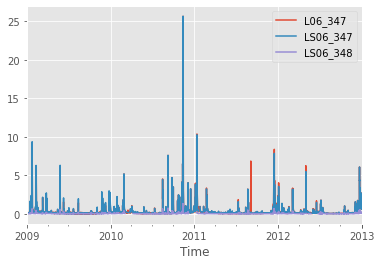

In [70]:
data.plot()

<AxesSubplot:xlabel='Time'>

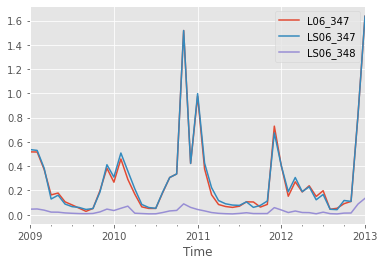

In [74]:
data.resample("M").mean().plot()

In [77]:
data.resample("M").median()

,L06_347,LS06_347,LS06_348
Time,,,
2009-01-31,0.216042,0.174125,0.023750
2009-02-28,0.301125,0.274542,0.032792
2009-03-31,0.234250,0.195917,0.023417
2009-04-30,0.151875,0.116458,0.020833
2009-05-31,0.101625,0.071625,0.015000
2009-06-30,0.080500,0.056125,0.011667
2009-07-31,0.064458,0.045250,0.010000
2009-08-31,0.037250,0.039583,0.008250
2009-09-30,0.026958,0.039792,0.008000


In [79]:
data.resample('Y').mean()

,L06_347,LS06_347,LS06_348
Time,,,
2009-12-31,0.219427,0.219074,0.024532
2010-12-31,0.340571,0.360104,0.031055
2011-12-31,0.241405,0.242392,0.018012
2012-12-31,0.228513,0.237368,0.025240
2013-12-31,1.636037,1.636037,0.134731


Other mathematical methods can also be specified:

In [ ]:
data.resample('D').max().head()

<div class="alert alert-info">
<b>REMEMBER</b>: <br><br>

The string to specify the new time frequency: http://pandas.pydata.org/pandas-docs/stable/user_guide/timeseries.html#offset-aliases <br>

These strings can also be combined with numbers, eg `'10D'`...

</div>



In [ ]:
data.resample('M').mean().plot() # 10D

<div class="alert alert-success">

<b>EXERCISE</b>:

 <ul>
  <li>plot the monthly standard deviation of the columns</li>
</ul>
</div>

<AxesSubplot:xlabel='Time'>

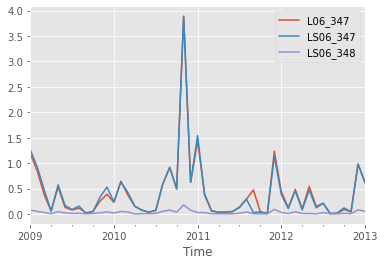

In [82]:
data.resample("M").std().plot()

In [ ]:
# %load _solutions/pandas_04_time_series_data5.py

<div class="alert alert-success">

<b>EXERCISE</b>:

 <ul>
  <li>plot the monthly mean and median values for the years 2011-2012 for 'L06_347'<br><br></li>
</ul>
    
**Note** remember the `agg` when using `groupby` to derive multiple statistics at the same time?
    
</div>

In [84]:
subset = data["2011":"2012"]

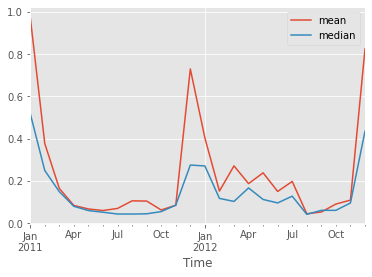

In [90]:
subset["L06_347"].resample("M").mean().plot(label="mean")
subset["L06_347"].resample("M").median().plot(label="median")
plt.legend()

<AxesSubplot:xlabel='Time'>

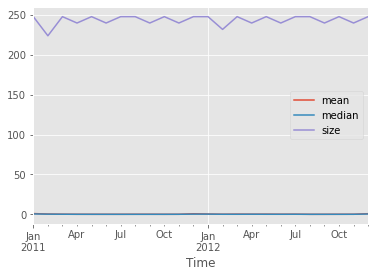

In [113]:
subset["L06_347"].resample("M").aggregate(["mean", "median", "size"]).plot()

In [ ]:
# %load _solutions/pandas_04_time_series_data6.py

<div class="alert alert-success">

<b>EXERCISE</b>:

 <ul>
  <li>plot the monthly mininum and maximum daily average value of the 'LS06_348' column</li>
</ul>
</div>

In [98]:
data

,L06_347,LS06_347,LS06_348
Time,,,
2009-01-01 00:00:00,0.137417,0.097500,0.016833
2009-01-01 03:00:00,0.131250,0.088833,0.016417
2009-01-01 06:00:00,0.113500,0.091250,0.016750
2009-01-01 09:00:00,0.135750,0.091500,0.016250
2009-01-01 12:00:00,0.140917,0.096167,0.017000
...,...,...,...
2013-01-01 12:00:00,1.710000,1.710000,0.129583
2013-01-01 15:00:00,1.420000,1.420000,0.096333
2013-01-01 18:00:00,1.178583,1.178583,0.083083


In [94]:
daily_average = data["LS06_348"].resample("D").mean()

In [97]:
daily_average.resample("M").aggregate(["min", "max"])

,min,max
Time,,
2009-01-31,0.013573,0.404708
2009-02-28,0.019073,0.231750
2009-03-31,0.016979,0.116969
2009-04-30,0.013917,0.037375
2009-05-31,0.013656,0.168792
2009-06-30,0.008417,0.063177
2009-07-31,0.008281,0.028073
2009-08-31,0.007000,0.035896
2009-09-30,0.005927,0.012906


In [99]:
data.head()

,L06_347,LS06_347,LS06_348
Time,,,
2009-01-01 00:00:00,0.137417,0.097500,0.016833
2009-01-01 03:00:00,0.131250,0.088833,0.016417
2009-01-01 06:00:00,0.113500,0.091250,0.016750
2009-01-01 09:00:00,0.135750,0.091500,0.016250
2009-01-01 12:00:00,0.140917,0.096167,0.017000


In [101]:
data.resample("H").asfreq().head()

,L06_347,LS06_347,LS06_348
Time,,,
2009-01-01 00:00:00,0.137417,0.097500,0.016833
2009-01-01 01:00:00,NaN,NaN,NaN
2009-01-01 02:00:00,NaN,NaN,NaN
2009-01-01 03:00:00,0.131250,0.088833,0.016417
2009-01-01 04:00:00,NaN,NaN,NaN


In [105]:
data.resample("H").interpolate()

,L06_347,LS06_347,LS06_348
Time,,,
2009-01-01 00:00:00,0.137417,0.097500,0.016833
2009-01-01 01:00:00,0.135361,0.094611,0.016694
2009-01-01 02:00:00,0.133306,0.091722,0.016556
2009-01-01 03:00:00,0.131250,0.088833,0.016417
2009-01-01 04:00:00,0.125333,0.089639,0.016528
...,...,...,...
2013-01-01 20:00:00,0.991694,0.991694,0.079139
2013-01-01 21:00:00,0.898250,0.898250,0.077167
2013-01-01 22:00:00,0.885500,0.885500,0.076444


In [ ]:
r.fillna()

In [ ]:
# %load _solutions/pandas_04_time_series_data7.py

In [ ]:
# %load _solutions/pandas_04_time_series_data8.py

<div class="alert alert-success">
<b>EXERCISE</b>:

 <ul>
  <li>Make a bar plot of the mean of the stations in year of 2013</li>
</ul>

</div>

<AxesSubplot:>

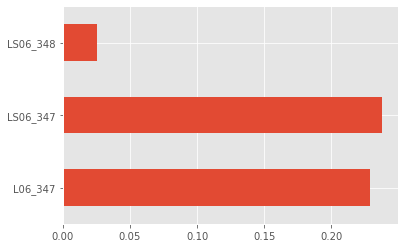

In [112]:
data["2012-01":"2012-12"].mean().plot(kind="barh")

In [114]:
# %load _solutions/pandas_04_time_series_data9.py
data['2013':'2013'].mean().plot(kind='barh')

In [118]:
data.loc[:, "2012"]

,L06_347,LS06_347,LS06_348
Time,,,
2012-01-01 00:00:00,0.307167,0.273917,0.028000
2012-01-01 03:00:00,0.302917,0.270833,0.030583
2012-01-01 06:00:00,0.331500,0.284750,0.030917
2012-01-01 09:00:00,0.330750,0.293583,0.029750
2012-01-01 12:00:00,0.295000,0.285167,0.031750
...,...,...,...
2012-12-31 09:00:00,0.682750,0.682750,0.066583
2012-12-31 12:00:00,0.651250,0.651250,0.063833
2012-12-31 15:00:00,0.629000,0.629000,0.061833
